In [1]:
import pandas as pd
import numpy as np

# LOAD DATASET

In [2]:
df = pd.read_csv('Taxi_Trip_Price.csv')
df.head(100)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,Morning,Weekend,1.0,Medium,Clear,3.43,0.91,0.50,67.43,60.0770
96,26.61,Morning,Weekday,4.0,Low,Rain,3.07,0.68,0.18,65.91,33.0286
97,21.95,Morning,Weekday,3.0,Medium,Clear,4.05,0.88,0.10,44.99,27.8650
98,2.25,Evening,Weekend,3.0,Low,Clear,3.99,1.88,0.50,NaN,40.6500


# SUMMARY INFORMATION

In [3]:
# ringkasan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [4]:
# ringkasan statistik deskriptif
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [5]:
# cek missing value
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [6]:
# cek missing percentage
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

# ringkasan keputusan untuk missing value
def missing_decision(pct):
    if pct < 5:
        return "Aman dihapus"
    elif 5 <= pct < 20:
        return "Pertimbangkan konteks"
    elif 20 <= pct <= 40:
        return "Lebih baik imputasi"
    else:
        return "Pertimbangkan hapus kolom"

missing_summary = pd.DataFrame({'Persentase Missing (%)': missing_percentage})
missing_summary['Keputusan'] = missing_summary['Persentase Missing (%)'].apply(missing_decision)
missing_summary = missing_summary.sort_values(by='Persentase Missing (%)',ascending=False)
missing_summary

,Persentase Missing (%),Keputusan
Trip_Distance_km,5.0,Pertimbangkan konteks
Time_of_Day,5.0,Pertimbangkan konteks
Day_of_Week,5.0,Pertimbangkan konteks
Passenger_Count,5.0,Pertimbangkan konteks
Traffic_Conditions,5.0,Pertimbangkan konteks
Weather,5.0,Pertimbangkan konteks
Base_Fare,5.0,Pertimbangkan konteks
Per_Km_Rate,5.0,Pertimbangkan konteks
Per_Minute_Rate,5.0,Pertimbangkan konteks
Trip_Duration_Minutes,5.0,Pertimbangkan konteks


In [7]:
# cek nilai duplikat
df.duplicated().sum()

np.int64(0)

In [8]:
# cek nilai unik
unique_summary = pd.DataFrame({
    'n_unique': df.nunique(),
    'unique_values': df.apply(lambda x: x.unique())
})

unique_summary

,n_unique,unique_values
Trip_Distance_km,867,"[19.35, 47.59, 36.87, 30.33, nan, 8.64, 3.85, ..."
Time_of_Day,4,"[Morning, Afternoon, Evening, Night, nan]"
Day_of_Week,2,"[Weekday, Weekend, nan]"
Passenger_Count,4,"[3.0, 1.0, 4.0, 2.0, nan]"
Traffic_Conditions,3,"[Low, High, Medium, nan]"
Weather,3,"[Clear, nan, Rain, Snow]"
Base_Fare,290,"[3.56, nan, 2.7, 3.48, 2.93, 2.55, 3.51, 2.97,..."
Per_Km_Rate,150,"[0.8, 0.62, 1.21, 0.51, 0.63, 1.71, 1.66, 1.87..."
Per_Minute_Rate,41,"[0.32, 0.43, 0.15, 0.48, nan, 0.23, 0.34, 0.47..."
Trip_Duration_Minutes,917,"[53.82, 40.57, 37.27, 116.81, 22.64, 89.33, 5...."


In [9]:
# cek outliers
numeric_cols = [
    'Trip_Distance_km',
    'Passenger_Count',
    'Base_Fare',
    'Per_Km_Rate',
    'Per_Minute_Rate',
    'Trip_Duration_Minutes',
    'Trip_Price'
]

def detect_outliers_iqr(df, columns):
    outlier_summary = {}

    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_summary[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_count': outliers.shape[0]
        }

    return pd.DataFrame(outlier_summary).T

outlier_summary = detect_outliers_iqr(df, numeric_cols)
outlier_summary

,lower_bound,upper_bound,outlier_count
Trip_Distance_km,-26.02625,77.06375,20.0
Passenger_Count,-1.37500,5.62500,0.0
Base_Fare,0.43500,6.55500,0.0
Per_Km_Rate,-0.26500,2.73500,0.0
Per_Minute_Rate,-0.11000,0.69000,0.0
Trip_Duration_Minutes,-43.87625,168.81375,0.0
Trip_Price,-19.29240,122.13440,26.0


In [10]:
# Outlier 1 - Trip_Distance_km
Q1 = df['Trip_Distance_km'].quantile(0.25)
Q3 = df['Trip_Distance_km'].quantile(0.75)
IQR = Q3 - Q1

lower_Trip_Distance_km = Q1 - 1.5 * IQR
upper_Trip_Distance_km = Q3 + 1.5 * IQR

Trip_Distance_km_outliers = df[(df['Trip_Distance_km'] < lower_Trip_Distance_km) | (df['Trip_Distance_km'] > upper_Trip_Distance_km)]

Trip_Distance_km_outliers

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
22,105.943550,Night,Weekend,2.0,Low,Rain,3.94,1.69,0.32,23.03,201.869509
27,138.098328,Evening,Weekend,4.0,Medium,Rain,2.24,1.75,0.32,94.86,280.877302
64,146.067047,Afternoon,Weekday,2.0,Medium,Clear,4.79,0.73,0.30,60.81,320.958664
108,112.830958,Afternoon,Weekday,2.0,High,Snow,3.35,1.90,0.23,78.63,233.008285
110,102.747556,Evening,Weekday,2.0,Medium,Clear,2.23,1.80,0.23,53.09,274.535087
141,109.616082,Afternoon,Weekday,4.0,High,Clear,4.46,1.69,0.23,53.88,327.217665
225,130.809001,Afternoon,Weekday,1.0,High,Clear,3.93,0.63,0.16,88.31,328.871769
267,116.196064,Afternoon,Weekend,4.0,Medium,Clear,2.20,0.85,0.25,19.63,206.699570
268,139.062230,Afternoon,Weekday,2.0,Low,Rain,2.80,1.82,0.14,50.83,276.840597
287,100.380420,Afternoon,Weekday,3.0,Medium,Rain,4.46,NaN,NaN,89.21,329.913004


In [11]:
# Outlier 2 - Trip_Price
Q1 = df['Trip_Price'].quantile(0.25)
Q3 = df['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_Trip_Price = Q1 - 1.5 * IQR
upper_Trip_Price = Q3 + 1.5 * IQR

Trip_Price_outliers = df[(df['Trip_Price'] < lower_Trip_Price) | (df['Trip_Price'] > upper_Trip_Price)]

Trip_Price_outliers

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
22,105.943550,Night,Weekend,2.0,Low,Rain,3.94,1.69,0.32,23.03,201.869509
27,138.098328,Evening,Weekend,4.0,Medium,Rain,2.24,1.75,0.32,94.86,280.877302
64,146.067047,Afternoon,Weekday,2.0,Medium,Clear,4.79,0.73,0.30,60.81,320.958664
108,112.830958,Afternoon,Weekday,2.0,High,Snow,3.35,1.90,0.23,78.63,233.008285
110,102.747556,Evening,Weekday,2.0,Medium,Clear,2.23,1.80,0.23,53.09,274.535087
141,109.616082,Afternoon,Weekday,4.0,High,Clear,4.46,1.69,0.23,53.88,327.217665
225,130.809001,Afternoon,Weekday,1.0,High,Clear,3.93,0.63,0.16,88.31,328.871769
267,116.196064,Afternoon,Weekend,4.0,Medium,Clear,2.20,0.85,0.25,19.63,206.699570
268,139.062230,Afternoon,Weekday,2.0,Low,Rain,2.80,1.82,0.14,50.83,276.840597
287,100.380420,Afternoon,Weekday,3.0,Medium,Rain,4.46,NaN,NaN,89.21,329.913004


# DISTRIBUTION AUDIT

In [12]:
# Deskriptive Statistik mendalam
num_cols = [
    'Trip_Distance_km',
    'Passenger_Count',
    'Base_Fare',
    'Per_Km_Rate',
    'Per_Minute_Rate',
    'Trip_Duration_Minutes',
    'Trip_Price'
]

df[num_cols].describe().T
df[num_cols].skew()

Trip_Distance_km         2.236010
Passenger_Count          0.016255
Base_Fare               -0.005149
Per_Km_Rate              0.079206
Per_Minute_Rate          0.058695
Trip_Duration_Minutes    0.017749
Trip_Price               3.732561
dtype: float64

- Skewed > 1 --> **Highly Skewed** --> Median atau pertimbangkan log transform
  
- 0.5 <= Skewed <= 1 --> **Moderately Skewed** --> Median masih aman daripada Mean

- Skewed < 0 --> **Normal Skewed** --> Mean masih acceptable

- Variabel **`Trip_Distance_km`** & **`Trip_Price`** diinterpretasikan sebagai **Highly Skewed** --> Gunakan median untuk proses imputation (Handling Missing Value)

- Variabel lainnya diinterpretasikan sebagai **Normal Skewed** --> Gunakan mean untuk proses imputation (Handling Missing Value)

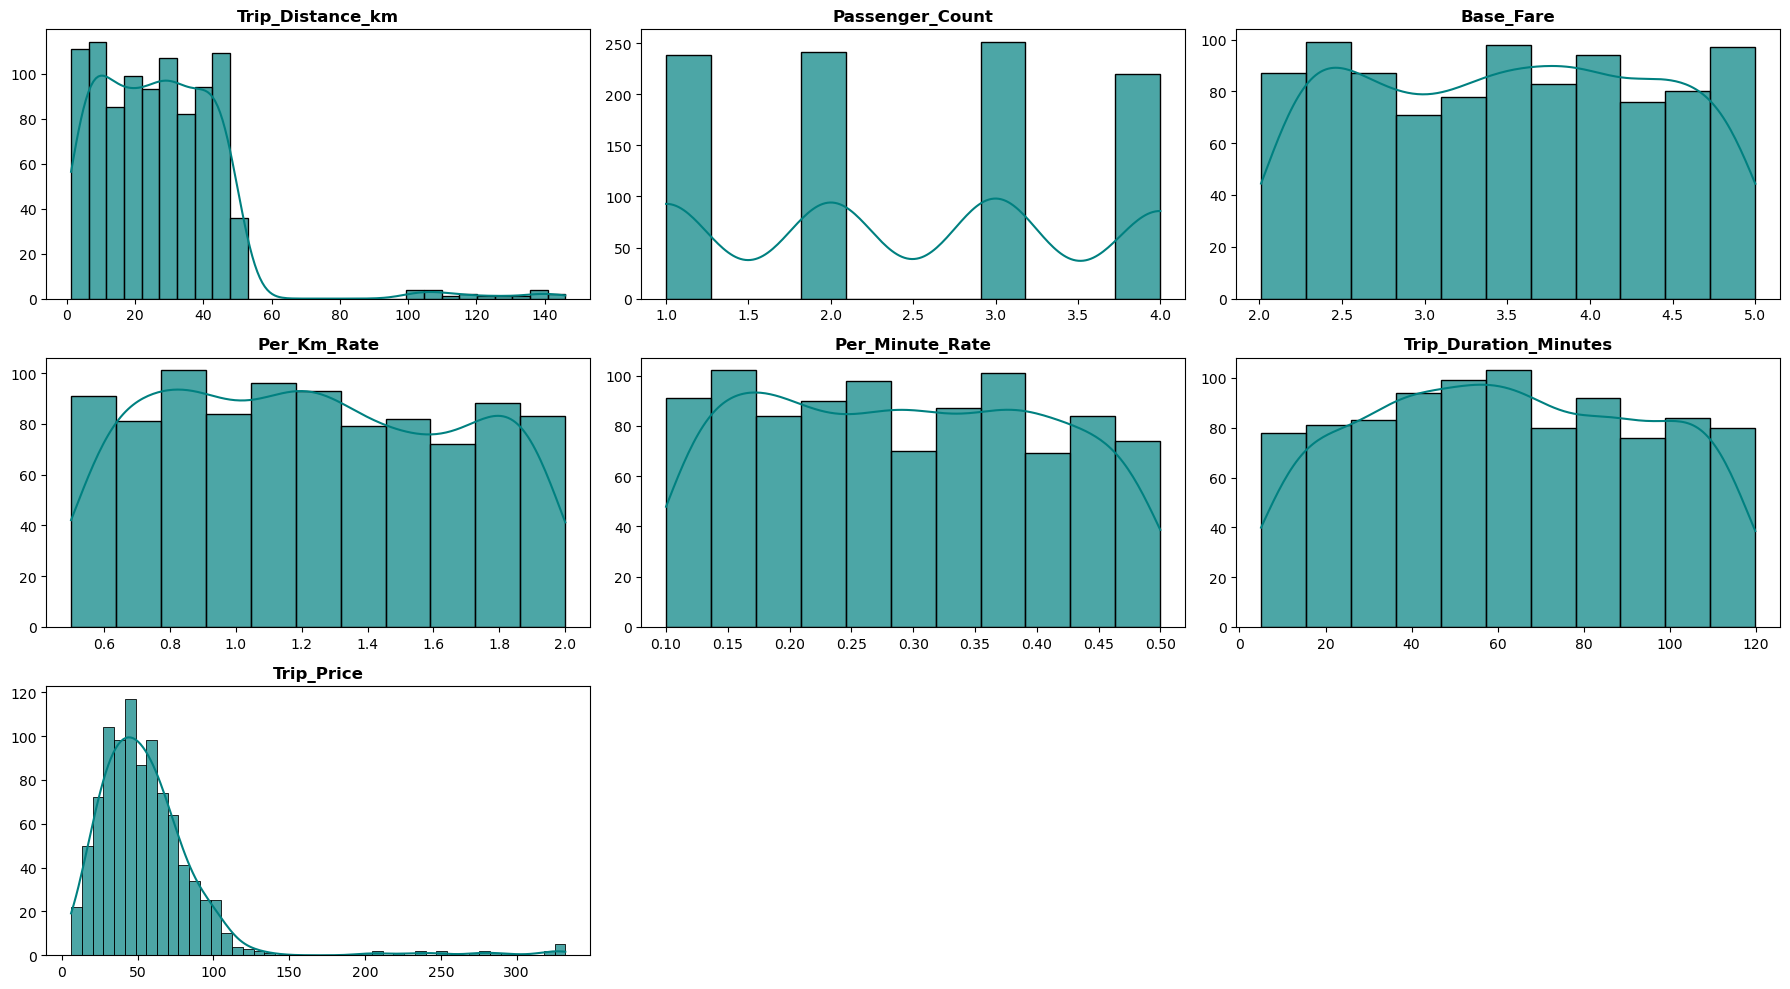

In [13]:
# Visual Distribution

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = [
    'Trip_Distance_km',
    'Passenger_Count',
    'Base_Fare',
    'Per_Km_Rate',
    'Per_Minute_Rate',
    'Trip_Duration_Minutes',
    'Trip_Price'
]

plt.figure(figsize=(18,10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)

    # Histogram
    sns.histplot(
        df[col],
        kde=True,
        color='teal',
        edgecolor='black',
        alpha=0.7
    )
    
    plt.title(col, fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    

plt.tight_layout()
plt.show()

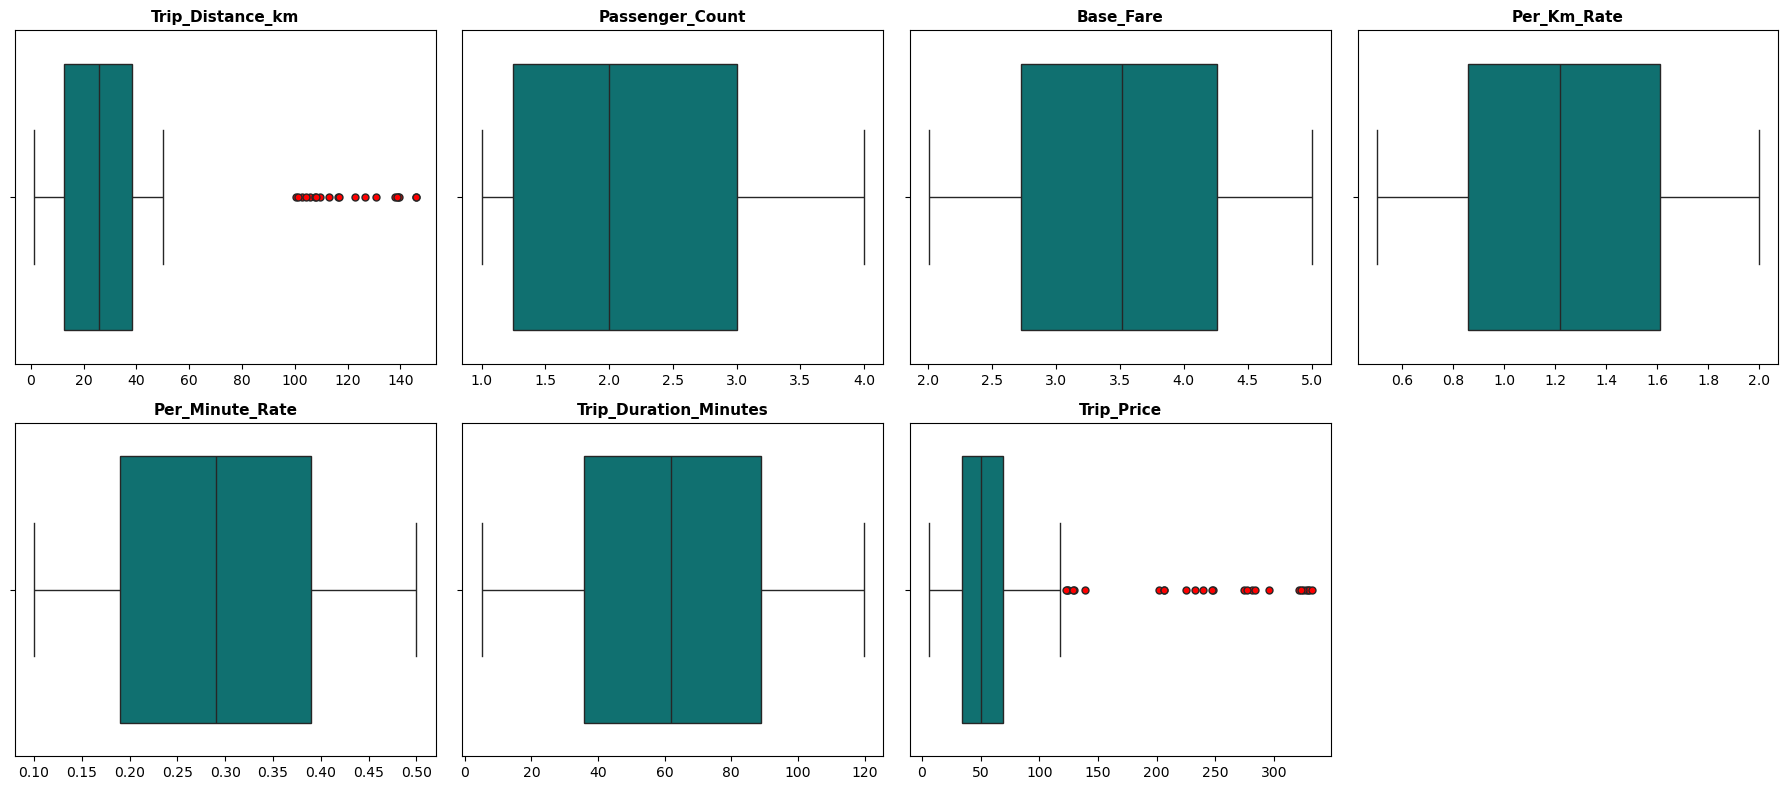

In [14]:
# Boxplot untuk outlier detection

plt.figure(figsize=(18,8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)

    sns.boxplot(
    x=df[col],
    color='teal',
    flierprops=dict(
        marker='o',
        markerfacecolor='red',
        markersize=5,
        linestyle='none'
    )
)
    plt.title(col, fontsize=11, fontweight='bold')
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [15]:
# Tabel Kesimpulan

import pandas as pd
import numpy as np

# Kolom
num_cols = [
    'Trip_Distance_km',
    'Passenger_Count',
    'Base_Fare',
    'Per_Km_Rate',
    'Per_Minute_Rate',
    'Trip_Duration_Minutes',
    'Trip_Price'
]

cat_cols = [
    'Time_of_Day',
    'Day_of_Week',
    'Traffic_Conditions',
    'Weather'
]

summary_data = []

for col in df.columns:
    
    # Missing Treatment
    if col in cat_cols:
        missing_treatment = '"Unknown"'
    else:
        skew = df[col].skew()
        if abs(skew) > 1:
            missing_treatment = "Median"
        else:
            missing_treatment = "Mean"
    
    # Outlier Detection (numerical only)
    if col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outlier_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
        outlier_detected = "Ya" if outlier_count > 0 else "Tidak"
        
        # Outlier Treatment Logic
        if outlier_count > 0 and abs(df[col].skew()) > 1:
            outlier_treatment = "Retain"
        elif outlier_count > 0:
            outlier_treatment = "Winsorization"
        else:
            outlier_treatment = "Tidak perlu"
            
    else:
        outlier_detected = "N/A"
        outlier_count = "-"
        outlier_treatment = "N/A"
    
    summary_data.append({
        "Variabel": col,
        "Missing Treatment": missing_treatment,
        "Outlier Detected": outlier_detected,
        "Outlier Count": outlier_count,
        "Outlier Treatment": outlier_treatment
    })

summary_table = pd.DataFrame(summary_data)
summary_table.set_index("Variabel")

,Missing Treatment,Outlier Detected,Outlier Count,Outlier Treatment
Variabel,,,,
Trip_Distance_km,Median,Ya,20,Retain
Time_of_Day,"""Unknown""",N/A,-,N/A
Day_of_Week,"""Unknown""",N/A,-,N/A
Passenger_Count,Mean,Tidak,0,Tidak perlu
Traffic_Conditions,"""Unknown""",N/A,-,N/A
Weather,"""Unknown""",N/A,-,N/A
Base_Fare,Mean,Tidak,0,Tidak perlu
Per_Km_Rate,Mean,Tidak,0,Tidak perlu
Per_Minute_Rate,Mean,Tidak,0,Tidak perlu


In [16]:
# backup data asli

df_raw = df.copy()

In [17]:
# inisialisasi data untuk proses cleaning

df_cleans = df.copy()
df_cleans.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


# HANDLING ISSUE

In [18]:
# Handling Missing Value

# Handling Categorical → Unknown
cat_cols = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
for col in cat_cols:
    df_cleans[col] = df_cleans[col].fillna('Unknown')
    
# Highly skewed → median
skewed_cols = ['Trip_Distance_km', 'Trip_Price']
for col in skewed_cols:
    df_cleans[col] = df_cleans[col].fillna(df_cleans[col].median())

# Relatively normal → mean
normal_cols = [
    'Passenger_Count',
    'Base_Fare',
    'Per_Km_Rate',
    'Per_Minute_Rate',
    'Trip_Duration_Minutes'
]
for col in normal_cols:
    df_cleans[col] = df_cleans[col].fillna(df_cleans[col].mean())

In [19]:
df_cleans.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

# STANDARISASI TIPE DATA

In [22]:
cat_cols = df_cleans.select_dtypes(include='object').columns

for col in cat_cols:
    df_cleans[col] = df_cleans[col].astype('category')

# LOAD DATASET BEFORE VS AFTER

In [20]:
df_raw.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.39,1.52,0.47,NaN,75.5657


In [24]:
df_raw.dtypes

Trip_Distance_km         float64
Time_of_Day               object
Day_of_Week               object
Passenger_Count          float64
Traffic_Conditions        object
Weather                   object
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object

In [25]:
df_raw.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [21]:
df_cleans.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.320000,53.820000,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.430000,40.570000,50.0745
2,36.87,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.150000,37.270000,52.9032
3,30.33,Evening,Weekday,4.0,Low,Unknown,3.480000,0.51,0.150000,116.810000,36.4698
4,25.83,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.320000,22.640000,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.550000,1.71,0.480000,89.330000,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.510000,1.66,0.292916,5.050000,11.2645
7,43.44,Evening,Weekend,3.0,Unknown,Clear,2.970000,1.87,0.230000,62.118116,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.770000,1.78,0.340000,110.330000,50.0745
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.390000,1.52,0.470000,62.118116,75.5657


In [26]:
df_cleans.dtypes

Trip_Distance_km          float64
Time_of_Day              category
Day_of_Week              category
Passenger_Count           float64
Traffic_Conditions       category
Weather                  category
Base_Fare                 float64
Per_Km_Rate               float64
Per_Minute_Rate           float64
Trip_Duration_Minutes     float64
Trip_Price                float64
dtype: object

In [27]:
df_cleans.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [28]:
df_cleans.to_csv('df_cleans.csv', index = False)

In [29]:
# checking validasi 

df_cek = pd.read_csv('df_cleans.csv')
df_cek.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.320000,53.820000,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.430000,40.570000,50.0745
2,36.87,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.150000,37.270000,52.9032
3,30.33,Evening,Weekday,4.0,Low,Unknown,3.480000,0.51,0.150000,116.810000,36.4698
4,25.83,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.320000,22.640000,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.550000,1.71,0.480000,89.330000,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.510000,1.66,0.292916,5.050000,11.2645
7,43.44,Evening,Weekend,3.0,Unknown,Clear,2.970000,1.87,0.230000,62.118116,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.770000,1.78,0.340000,110.330000,50.0745
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.390000,1.52,0.470000,62.118116,75.5657
